In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_tain),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 38s 3us/step


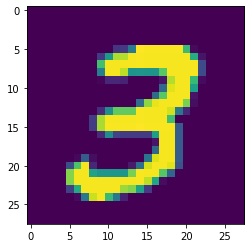

In [12]:
plt.imshow(X_train[7])

In [13]:
X_train.shape

(60000, 28, 28)

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [18]:
to_categorical(y_test)[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [28]:
y_cat_train = to_categorical(y_tain,num_classes=10)

In [33]:
X_train[0].min()

0

In [34]:
X_train[0].max()

255

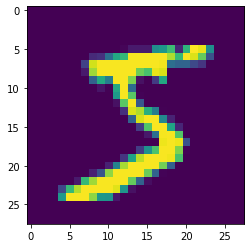

In [32]:
plt.imshow(X_train[0])

In [35]:
X_train = X_train/255

In [36]:
X_test = X_test/255

In [55]:
X_train = X_train.reshape(60000, 28, 28,1)

In [57]:
X_test = X_test.reshape(10000, 28, 28,1)

In [73]:
X_train.shape

(60000, 28, 28, 1)

In [74]:
y_cat_train.shape

(60000, 10)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten

In [75]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(128,activation='relu'))
 

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [106]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001E72947D6D0>>

In [76]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1415 - accuracy: 0.9581 - val_loss: 0.0609 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0481 - accuracy: 0.9852 - val_loss: 0.0425 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.0357 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0384 - val_accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.0455 - val_accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0361 - val_accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0416 -

In [77]:
loss = pd.DataFrame(model.history.history)

In [78]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.141453,0.958067,0.060948,0.9832
1,0.048090,0.985233,0.042471,0.9857
2,0.031385,0.990467,0.035675,0.9874
3,0.021045,0.993433,0.038402,0.9868
4,0.014757,0.994967,0.045524,0.9870
5,0.011212,0.996517,0.036148,0.9874
6,0.009112,0.996717,0.041612,0.9893
7,0.006249,0.998000,0.042064,0.9886
8,0.006301,0.997850,0.040012,0.9893
9,0.005358,0.998267,0.040911,0.9895


<AxesSubplot:>

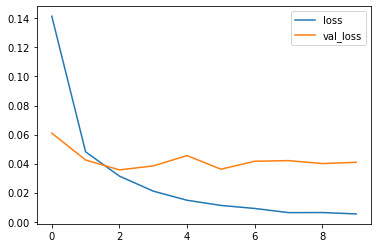

In [79]:
loss[['loss','val_loss']].plot()

<AxesSubplot:>

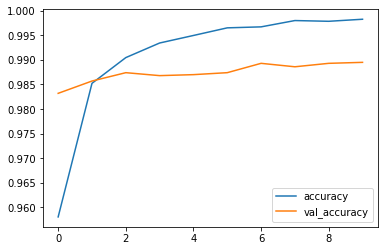

In [80]:
loss[['accuracy','val_accuracy']].plot()

In [98]:
new_img = X_train[12]

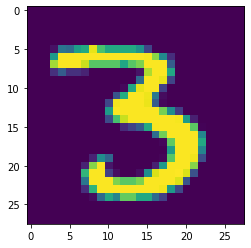

In [99]:
plt.imshow(new_img)

In [103]:
model.predict(new_img.reshape(1,28,28,1))

array([[9.0160457e-21, 1.3170675e-19, 5.4566053e-15, 1.0000000e+00,
        4.1499370e-20, 8.3674370e-15, 1.0274978e-22, 7.2052711e-20,
        3.7118086e-12, 1.1647844e-12]], dtype=float32)

In [104]:
import tensorflow as tf

In [105]:
tf.argmax(model.predict(new_img.reshape(1,28,28,1)),axis=1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([3], dtype=int64)>